In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch as torch
import torch.nn as nn

In [4]:
from google.colab import files # 11mins
uploaded = files.upload()

Saving characters.csv to characters (1).csv
Saving trained_sample.pth to trained_sample (1).pth


In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(20, 16)
        self.fc2 = nn.Linear(16, 9)
        self.fc3 = nn.Linear(9, 3)
        self.fc4 = nn.Linear(3, 1)
        self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        self.criterion = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)



    def forward(self, x1, x2):
        # Element-wise subtraction
        x = x1 - x2
        # Forward pass with shared weights
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x

    def loss(self, output, target):
        return self.criterion(output, target)

    def backward(self, loss):
        loss.backward()

    def train(self, x1, x2, target):
        # Forward pass
        output = self.forward(x1, x2)
        # Compute the loss
        loss = self.loss(output, target)
        # Zero the gradients
        self.optimizer.zero_grad()
        # Backward pass
        self.backward(loss)
        # Update the weights
        self.optimizer.step()
        return loss



# Loading in the Model

In [11]:
# IF GPU is availible
# model = torch.load("trained_sample.pth")

#if no GPU
model = torch.load("trained_sample.pth", map_location=torch.device('cpu'))

# Visualisation

In [12]:
chars = pd.read_csv('characters.csv') #TODO change this to 'characters.csv'

In [20]:
rank = []
labels = []
c = chars.columns[1:]
for char in c:
  rank.append(chars[char].tolist())
  labels.append(char)

print(rank)
print(labels)

ranks = {}
for i in range(len(labels)):
  t1 = rank[i]
  t2 = np.zeros(20)

  t1 = torch.tensor(t1, dtype=torch.float32)
  t2 = torch.tensor(t2, dtype=torch.float32)

  m = float(model.forward(t1,t2))
  ranks[labels[i]] = m

ranks




[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

{'Man': 0.7030535936355591,
 'Woman': 0.7115179300308228,
 'Pregnant': 0.7448011636734009,
 'Stroller': 0.7523080110549927,
 'OldMan': 0.6480435132980347,
 'OldWoman': 0.6550480723381042,
 'Boy': 0.7432578802108765,
 'Girl': 0.7410088777542114,
 'Homeless': 0.6650252342224121,
 'LargeWoman': 0.6996065974235535,
 'LargeMan': 0.6725270748138428,
 'Criminal': 0.5106524229049683,
 'MaleExecutive': 0.6929348111152649,
 'FemaleExecutive': 0.7070587873458862,
 'FemaleAthlete': 0.7136168479919434,
 'MaleAthlete': 0.705409049987793,
 'FemaleDoctor': 0.7250454425811768,
 'MaleDoctor': 0.7308881282806396,
 'Dog': 0.5612236857414246,
 'Cat': 0.5287021398544312}

 # All Chars

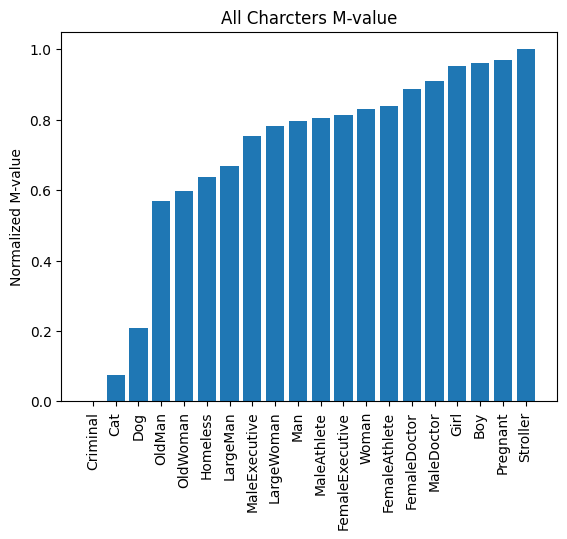

In [23]:
sorted_d = sorted(ranks.items(), key=lambda x: x[1])

x = [i[1] for i in sorted_d]
labels = [i[0] for i in sorted_d]

x = np.array(x)
x1 = x - x.min()
x1 = x1 / x1.max()


plt.bar(labels, x1)
plt.ylabel('Normalized M-value')
plt.title('All Charcters M-value')

plt.xticks(rotation=90)
plt.show()






# Man vs Dog

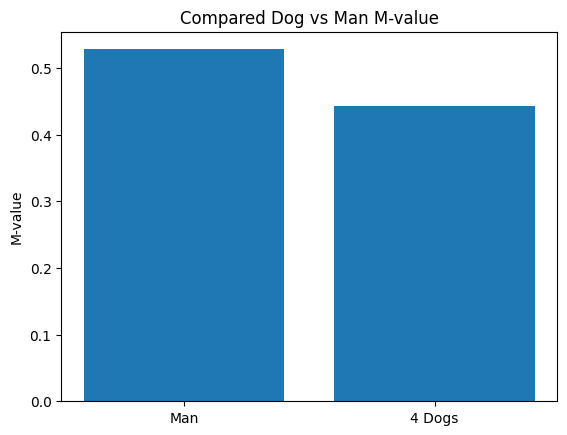

[0.5279831886291504, 0.4425671100616455]


In [31]:

labels = ['Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat']

man = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dog = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0])

man = torch.tensor(man, dtype=torch.float32)
dog = torch.tensor(dog, dtype=torch.float32)


m_1 = float(model.forward(man,dog))
m_2 = float(model.forward(dog,man))

[m_1, m_2]

plt.bar(['Man', '4 Dogs'],[m_1, m_2])
plt.ylabel('M-value')
plt.title('Compared Dog vs Man M-value')

plt.show()
print([m_1, m_2]
)





# Old vs Younge

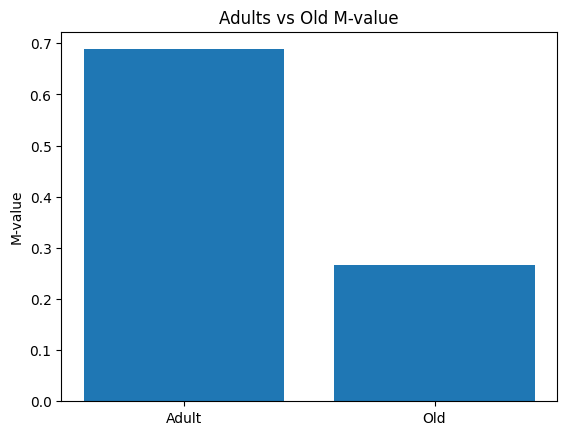

[0.6882513761520386, 0.2660191059112549]


In [34]:

labels = ['Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat']

young  = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
old  = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

v1 = torch.tensor(young, dtype=torch.float32)
v2 = torch.tensor(old, dtype=torch.float32)


m_1 = float(model.forward(v1,v2))
m_2 = float(model.forward(v2,v1))

[m_1, m_2]

plt.bar(['Adult', 'Old'],[m_1, m_2])
plt.ylabel('M-value')
plt.title('Adults vs Old M-value')

plt.show()
print([m_1, m_2]
)





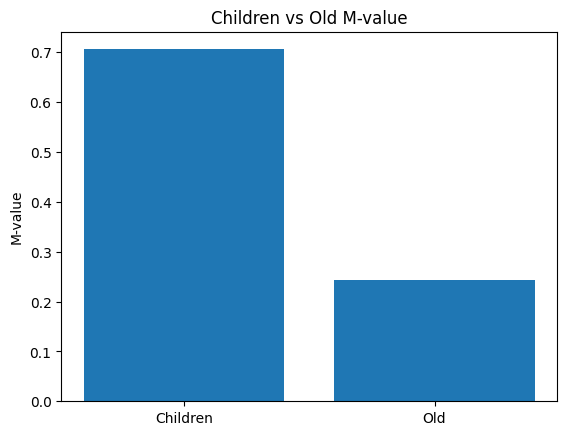

[0.705854594707489, 0.24220722913742065]


In [36]:

labels = ['Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat']

young  = np.array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
old  = np.array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

v1 = torch.tensor(young, dtype=torch.float32)
v2 = torch.tensor(old, dtype=torch.float32)


m_1 = float(model.forward(v1,v2))
m_2 = float(model.forward(v2,v1))

[m_1, m_2]

plt.bar(['Children', 'Old'],[m_1, m_2])
plt.ylabel('M-value')
plt.title('Children vs Old M-value')

plt.show()
print([m_1, m_2]
)





# Fitness

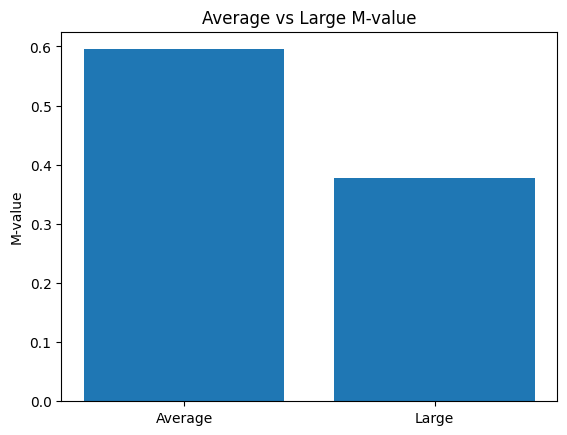

[0.5952422022819519, 0.377143919467926]


In [37]:

labels = ['Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat']

Average  = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Large  = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

v1 = torch.tensor(Average, dtype=torch.float32)
v2 = torch.tensor(Large, dtype=torch.float32)


m_1 = float(model.forward(v1,v2))
m_2 = float(model.forward(v2,v1))

[m_1, m_2]

plt.bar(['Average', 'Large'],[m_1, m_2])
plt.ylabel('M-value')
plt.title('Average vs Large M-value')

plt.show()
print([m_1, m_2]
)





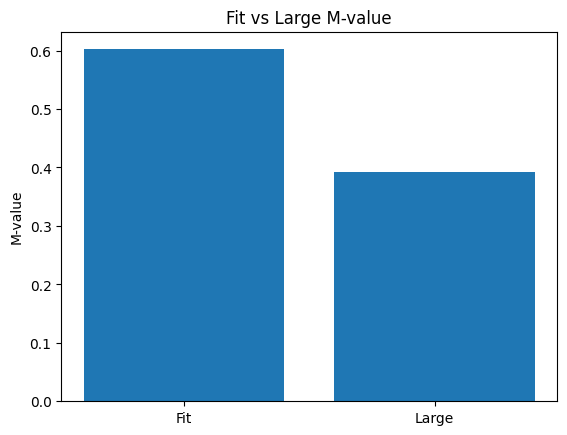

[0.6022012829780579, 0.39296090602874756]


In [38]:

labels = ['Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat']

Fit  = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])
Large  = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

v1 = torch.tensor(Fit, dtype=torch.float32)
v2 = torch.tensor(Large, dtype=torch.float32)


m_1 = float(model.forward(v1,v2))
m_2 = float(model.forward(v2,v1))

[m_1, m_2]

plt.bar(['Fit', 'Large'],[m_1, m_2])
plt.ylabel('M-value')
plt.title('Fit vs Large M-value')

plt.show()
print([m_1, m_2]
)





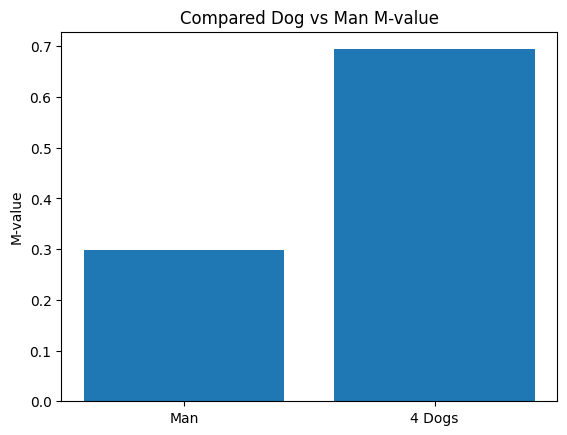

[0.29777052998542786, 0.6941904425621033]


In [40]:

labels = ['Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless', 'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat']

man = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
dog = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 60])

man = torch.tensor(man, dtype=torch.float32)
dog = torch.tensor(dog, dtype=torch.float32)


m_1 = float(model.forward(man,dog))
m_2 = float(model.forward(dog,man))

[m_1, m_2]

plt.bar(['Man', '4 Dogs'],[m_1, m_2])
plt.ylabel('M-value')
plt.title('Compared Dog vs Man M-value')

plt.show()
print([m_1, m_2]
)



